In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
import pathlib

In [4]:
HOME = pathlib.Path.home()

In [5]:
HOME

PosixPath('/home/nicolasf')

In [6]:
var_name = 'T2M'

In [7]:
dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'REANALYSIS' / 'ERA5' / var_name

In [8]:
lfiles = list(dpath.glob("*.nc"))

In [9]:
lfiles.sort()

In [10]:
lfiles[:10]

[PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_01.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_02.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_03.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_04.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_05.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_06.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_07.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_08.nc'),
 PosixPath('/home/nicolasf/drive

In [11]:
lfiles[-10:]

[PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_03.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_04.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_05.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_06.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_07.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_08.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_09.nc'),
 PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_2016_10.nc'),
 PosixPath('/home/nicolasf/drive

In [12]:
dset = xr.open_mfdataset(lfiles, concat_dim='time', combine='nested')

In [13]:
dset.nbytes / 1e9

1.893762052

In [14]:
clim = dset.sel(time=slice('1993','2016'))

In [15]:
clim = clim.groupby(clim.time.dt.month).mean()

In [20]:
dset_rm = dset.rolling(time=3, min_periods=3).mean()

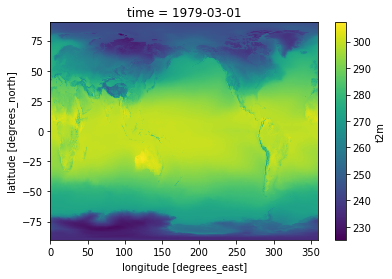

In [25]:
dset_rm.isel(time=2)['t2m'].plot()

In [26]:
dset_rm = dset_rm.isel(time=slice(2,None))

In [31]:
clim_seas = dset_rm.sel(time=slice('1993','2016'))

In [32]:
clim_seas = clim_seas.groupby(clim_seas.time.dt.month).mean()

In [ ]:
clim_seas.sel(month=1)['t2m'].plot()

In [19]:
clim

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, month: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (month, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>

In [20]:
anoms = dset.groupby(dset.time.dt.month) - clim

In [21]:
anoms

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 456)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>

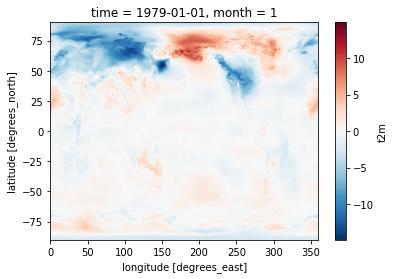

In [22]:
anoms.isel(time=0)['t2m'].plot()